<a href="https://colab.research.google.com/github/vault5673/Clustering-with-K-Means/blob/main/Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [16]:
# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [17]:
# Drop non-numeric columns (like CustomerID and Gender)
df_numeric = df.drop(columns=['CustomerID', 'Gender'])  # Adjust if needed

In [18]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [19]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [20]:
# Elbow method to find optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

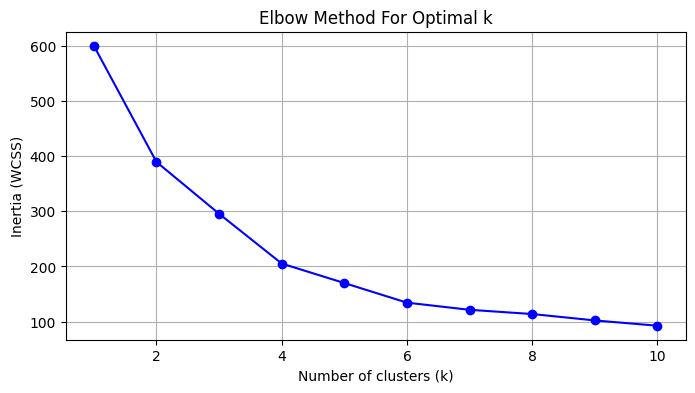

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [22]:
# Fit KMeans with chosen k (e.g., k=5 based on elbow)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [23]:
# Add cluster labels to DataFrame
df['Cluster'] = cluster_labels

In [25]:
# Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score for k={optimal_k}: {sil_score:.2f}')

Silhouette Score for k=5: 0.41


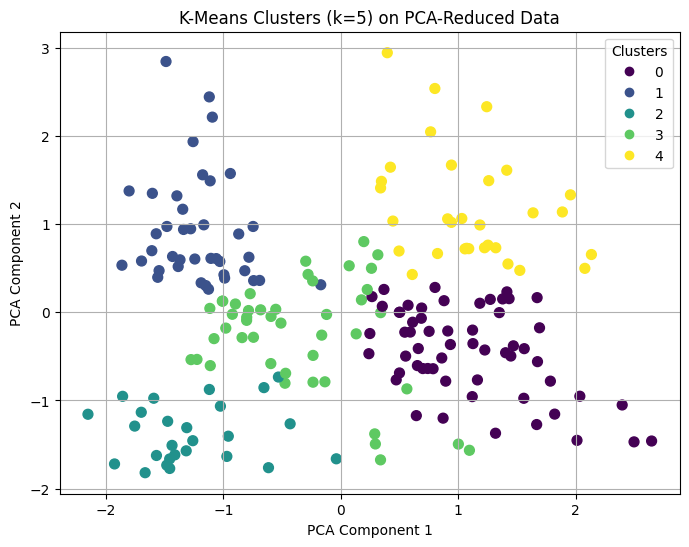

In [26]:
# Visualize clusters in 2D (PCA-reduced)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clusters (k={optimal_k}) on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()